## Describa el modelo y la optimización de los GPR, GPC, VGP, SGPR, y SVGP.

## GPR (Gaussian Process Regression) - Regresión con Procesos Gaussianos
Modelo:

En GPR, se asume que los datos de salida 
𝑦
y pueden ser modelados mediante una función latente f(x) perturbada por ruido Gaussiano:

$$ y = f(x) + \varepsilon, \quad \varepsilon \sim \mathcal{N}(0, \sigma_n^2) $$

La función latente f(x) se modela como un proceso Gaussiano:

$$ f(x) \sim \mathcal{GP}(m(x), k(x, x')) $$


m(x): función de media (a menudo asumida cero).
k(x,x'): función de covarianza o kernel que captura la similitud entre puntos.

Optimización:

El objetivo es inferir la distribución posterior de f(x) dadas las observaciones (X,y). Debido a que todo es Gaussiano, la inferencia es exacta.

Para ajustar el modelo, se maximiza el logaritmo de la probabilidad marginal (log-marginal likelihood) respecto a los hiperparámetros θ del kernel:

$$ 
\log p(\mathbf{y} | X, \theta) = -\frac{1}{2} \mathbf{y}^\top \left( K + \sigma_n^2 I \right)^{-1} \mathbf{y} - \frac{1}{2} \log \left| K + \sigma_n^2 I \right| - \frac{n}{2} \log 2\pi
$$

La optimización se realiza típicamente mediante métodos numéricos como el gradiente descendente o algoritmos de segundo orden como BFGS, utilizando las derivadas del logaritmo de la probabilidad marginal respecto a 𝜃.

## GPC (Gaussian Process Classification) - Clasificación con Procesos Gaussianos

Modelo:

Para problemas de clasificación, se utiliza una función latente f(x) pasada a través de una función de enlace (por ejemplo, la función sigmoide para clasificación binaria):

$$ 
p(y = 1 \mid x) = \sigma(f(x)) = \frac{1}{1 + \exp(-f(x))}
$$


## VGP (Variational Gaussian Process) - Proceso Gaussiano Variacional

Modelo:

El VGP es una técnica que aplica inferencia variacional a procesos Gaussianos, permitiendo manejar:

Ruido no Gaussiano en los datos.
Funciones de enlace no conjugadas.
Se define una distribución variacional q(f) para aproximar la distribución posterior p(f∣y).

Optimización:

Se maximiza la Evidencia Inferior (ELBO):

$$ \text{ELBO} = \int q(f) \log \left( \frac{p(\mathbf{y} \mid f) \, p(f)}{q(f)} \right) df
$$

La ELBO se descompone en:

Término de expectativa:
$$ \mathbb{E}_{q(f)} \left[ \log p(\mathbf{y} \mid f) \right]
$$

Divergencia KL:

$$ \mathbb{E}_{q(f)} \left[ \log p(\mathbf{y} \mid f) \right]
$$


La optimización se realiza respecto a los parámetros de q(f) y los hiperparámetros del modelo, utilizando gradientes calculados mediante técnicas de diferenciación automática.


## SGPR (Sparse Gaussian Process Regression) - Regresión con Procesos Gaussianos Esparsos

Modelo:

SGPR aborda la escalabilidad de GPR, ya que el costo computacional de GPR es $O(n^3)$. SGPR reduce este costo introduciendo puntos de soporte (inducing points) 𝑍 y variables latentes asociadas u:

$$ \mathbf{u} = f(\mathbf{Z})
$$

Se asume que f(x) puede ser aproximado mediante una proyección en los puntos de soporte.

Optimización:

La probabilidad marginal se aproxima y se maximiza respecto a:

Hiperparámetros del kernel.
Ubicaciones de los puntos de soporte Z.
La función objetivo es una versión aproximada del logaritmo de la probabilidad marginal:

$$ \log p(\mathbf{y} \mid X, \mathbf{Z}, \theta) \approx -\frac{1}{2} \mathbf{y}^\top \left( \mathbf{Q} + \sigma_n^2 \mathbf{I} \right)^{-1} \mathbf{y} - \frac{1}{2} \log \left| \mathbf{Q} + \sigma_n^2 \mathbf{I} \right| - \frac{n}{2} \log 2\pi
$$

Donde Q es:

$$ \mathbf{Q} = \mathbf{K}_{X \mathbf{Z}} \mathbf{K}_{\mathbf{Z} \mathbf{Z}}^{-1} \mathbf{K}_{\mathbf{Z} X}
$$

$K_{XZ}$: matriz de covarianza entre  $X y Z$

$𝐾_{𝑍𝑍}$​: matriz de covarianza evaluada en $Z$

La optimización se realiza mediante métodos numéricos estándar, aprovechando que el costo computacional ahora es 

$O(nm^2)$, con $𝑚$ siendo el número de puntos de soporte.

## SVGP (Stochastic Variational Gaussian Process) - Proceso Gaussiano Variacional Estocástico

Modelo:

SVGP combina las ideas de VGP y SGPR para manejar grandes conjuntos de datos y funciones de enlace no conjugadas.

Se utilizan puntos de soporte $𝑍$ y se define una distribución variacional sobre $u$:

$$q(\mathbf{u}) = \mathcal{N}(\mathbf{m}, \mathbf{S})
 $$

La función latente en cualquier punto $𝑥$ se condiciona en $𝑢$:

$$ q(f(x)) = \int p(f(x) \mid \mathbf{u}) \, q(\mathbf{u}) \, d\mathbf{u}
$$

Optimización:

La ELBO se estima utilizando mini-lotes de datos:

$$ \text{ELBO} = \sum_{i=1}^{n} \mathbb{E}_{q(f_i)} \left[ \log p(y_i \mid f_i) \right] - \text{KL}\left( q(\mathbf{u}) \, \| \, p(\mathbf{u}) \right)
$$

Debido al uso de mini-lotes, se puede aplicar optimización estocástica:

Algoritmos como Adam o RMSProp.
Cálculo eficiente de gradientes mediante técnicas como el método de reparametrización.
La optimización es escalable y permite manejar conjuntos de datos muy grandes, manteniendo el costo computacional por iteración independiente del tamaño total del conjunto de datos.

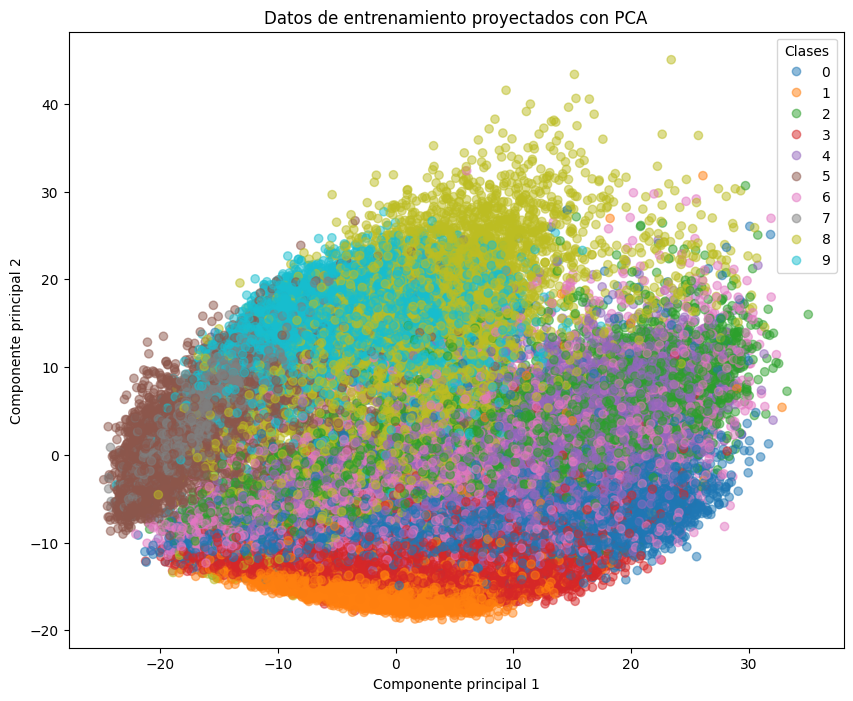

Epoch 1/100, Loss: 597.0084
Epoch 2/100, Loss: 532.5888
Epoch 3/100, Loss: 423.8118
Epoch 4/100, Loss: 417.3643
Epoch 5/100, Loss: 414.4128
Epoch 6/100, Loss: 414.5507
Epoch 7/100, Loss: 413.6598
Epoch 8/100, Loss: 413.4719
Epoch 9/100, Loss: 412.3180
Epoch 10/100, Loss: 412.2496
Epoch 11/100, Loss: 411.4066
Epoch 12/100, Loss: 412.0303
Epoch 13/100, Loss: 411.6631
Epoch 14/100, Loss: 412.2571
Epoch 15/100, Loss: 411.9357
Epoch 16/100, Loss: 411.8718
Epoch 17/100, Loss: 410.6777
Epoch 18/100, Loss: 412.1767
Epoch 19/100, Loss: 412.2387
Epoch 20/100, Loss: 411.3974
Epoch 21/100, Loss: 411.2574
Epoch 22/100, Loss: 411.3211
Epoch 23/100, Loss: 411.0648
Epoch 24/100, Loss: 411.7782
Epoch 25/100, Loss: 411.2302
Epoch 26/100, Loss: 411.0244
Epoch 27/100, Loss: 411.0241
Epoch 28/100, Loss: 410.8736
Epoch 29/100, Loss: 410.8186
Epoch 30/100, Loss: 411.3627
Epoch 31/100, Loss: 411.6375
Epoch 32/100, Loss: 411.4209
Epoch 33/100, Loss: 411.7793
Epoch 34/100, Loss: 410.7590
Epoch 35/100, Loss: 411

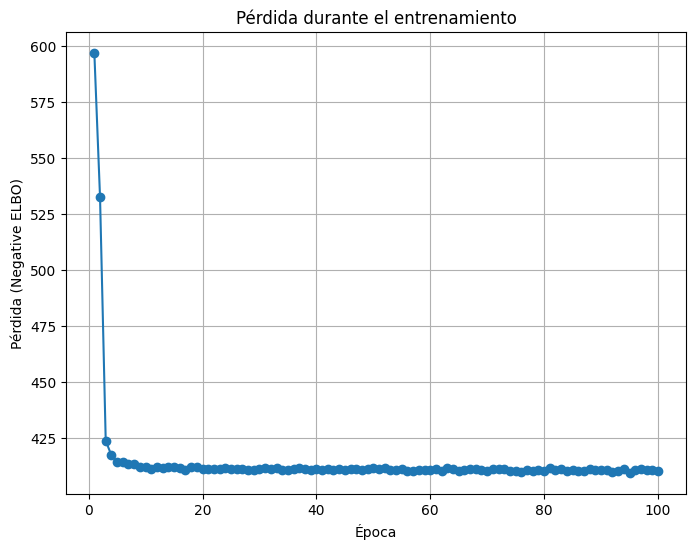

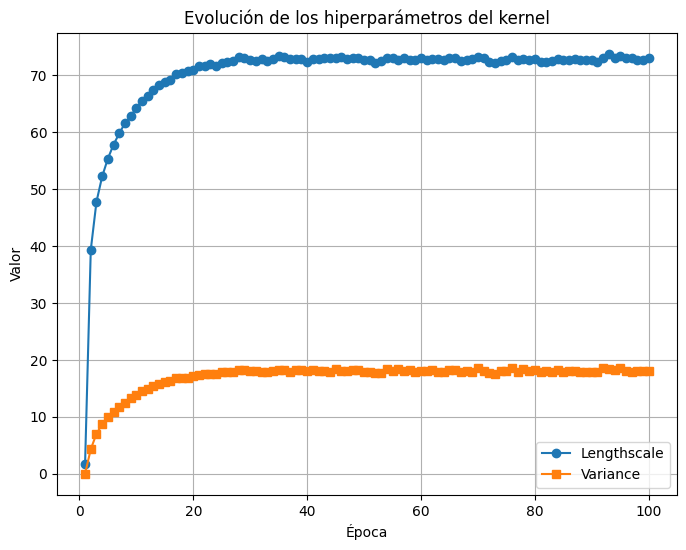

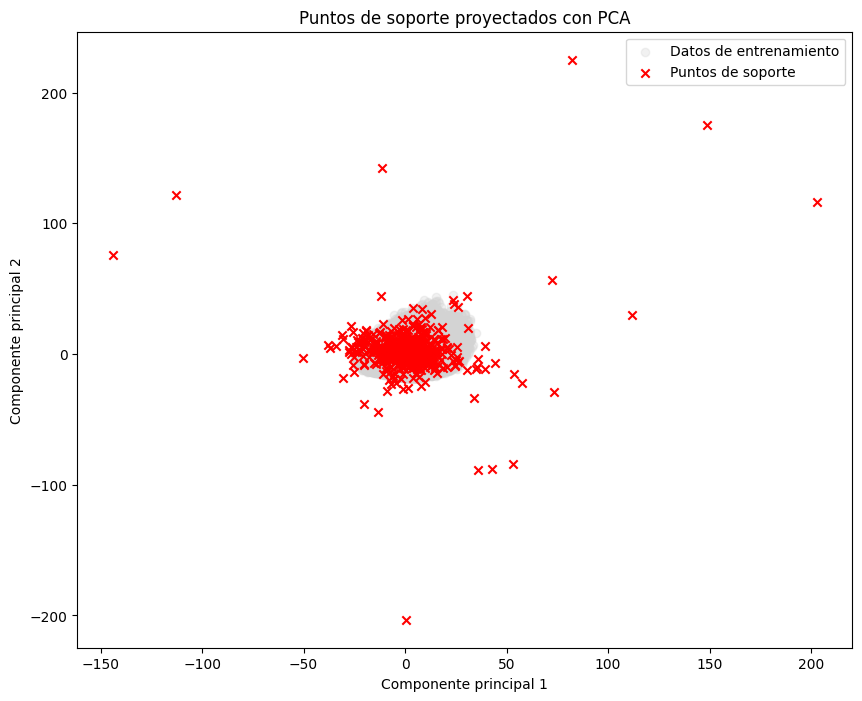

Precisión en el conjunto de prueba: 75.39%


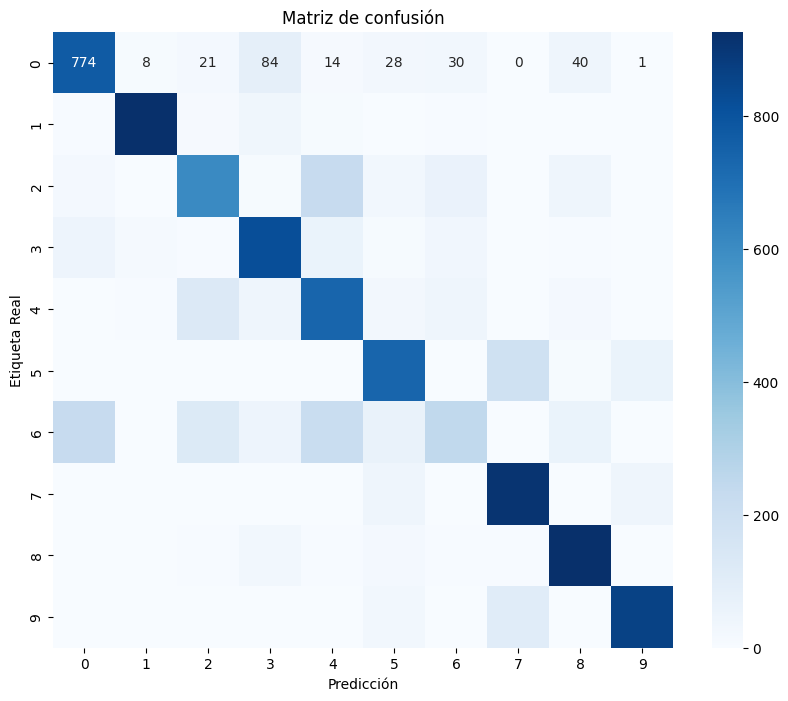

In [10]:
import numpy as np
import tensorflow as tf
import gpflow

# Configurar GPflow para usar tf.float32
gpflow.config.set_default_float(tf.float32)

#from gpflow.ci_utils import ci_niter
from gpflow.kernels import SharedIndependent
from gpflow.utilities import set_trainable
from tensorflow.keras.datasets import fashion_mnist
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.gaussian_process.kernels import RBF, ConstantKernel

# Cargar los datos de FashionMNIST
(X_train, Y_train), (X_test, Y_test) = fashion_mnist.load_data()

# Aplanar y normalizar las imágenes
X_train = X_train.reshape(-1, 28*28).astype(np.float32) / 255.0
X_test = X_test.reshape(-1, 28*28).astype(np.float32) / 255.0

# Estandarizar las características
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train).astype(np.float32)
X_test = scaler.transform(X_test).astype(np.float32)

# Convertir las etiquetas a enteros y ajustar su forma
Y_train = Y_train.astype(np.int32).reshape(-1, 1)
Y_test = Y_test.astype(np.int32).reshape(-1, 1)

# Realizar PCA para reducir a 2 dimensiones
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

# Graficar los datos proyectados con PCA
plt.figure(figsize=(10, 8))
scatter = plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], c=Y_train.flatten(), cmap='tab10', alpha=0.5)
plt.legend(*scatter.legend_elements(), title="Clases")
plt.title("Datos de entrenamiento proyectados con PCA")
plt.xlabel("Componente principal 1")
plt.ylabel("Componente principal 2")
plt.show()

# Crear un conjunto de datos de TensorFlow
batch_size = 256

train_dataset = tf.data.Dataset.from_tensor_slices((X_train, Y_train))
train_dataset = train_dataset.shuffle(buffer_size=1024).batch(batch_size)

test_dataset = tf.data.Dataset.from_tensor_slices((X_test, Y_test))
test_dataset = test_dataset.batch(batch_size)

num_features = X_train.shape[1]


# Definir la Función de Verosimilitud
num_classes = 10
likelihood = gpflow.likelihoods.Softmax(num_classes)

# Inicializar los Puntos de Soporte (Inducing Points)
num_inducing = 500  # Número de puntos de soporte
inducing_variable = X_train[np.random.permutation(X_train.shape[0])[:num_inducing]]

# Crear el kernel
kernel = gpflow.kernels.SquaredExponential()


# Definir el Modelo SVGP
model = gpflow.models.SVGP(
    kernel=kernel,
    likelihood=likelihood,
    inducing_variable=inducing_variable,
    num_latent_gps=num_classes,
    whiten=True,
    q_diag=True
)

# Configuración del Optimizador
learning_rate = 0.1
optimizer = tf.optimizers.Adam(learning_rate)

# Listas para almacenar el historial de entrenamiento
loss_history = []
lengthscale_history = []
variance_history = []

# Definir el Paso de Optimización
@tf.function
def optimization_step(batch_x, batch_y):
    with tf.GradientTape() as tape:
        loss = -model.elbo((batch_x, batch_y))
    gradients = tape.gradient(loss, model.trainable_variables)
    optimizer.apply_gradients(zip(gradients, model.trainable_variables))
    return loss

# Entrenamiento del Modelo
num_epochs = 100

for epoch in range(num_epochs):
    epoch_loss = 0.0
    for step, (batch_x, batch_y) in enumerate(train_dataset):
        loss = optimization_step(batch_x, batch_y)
        epoch_loss += loss.numpy()
    average_loss = epoch_loss / (step + 1)
    loss_history.append(average_loss)
    # Almacenar los hiperparámetros del kernel
    lengthscale_history.append(model.kernel.lengthscales.numpy())
    variance_history.append(model.kernel.variance.numpy())
    print(f"Epoch {epoch + 1}/{num_epochs}, Loss: {average_loss:.4f}")

# Graficar la pérdida a lo largo del entrenamiento
plt.figure(figsize=(8, 6))
plt.plot(range(1, num_epochs + 1), loss_history, marker='o')
plt.title("Pérdida durante el entrenamiento")
plt.xlabel("Época")
plt.ylabel("Pérdida (Negative ELBO)")
plt.grid(True)
plt.show()

# Graficar los hiperparámetros del kernel
plt.figure(figsize=(8, 6))
plt.plot(range(1, num_epochs + 1), lengthscale_history, marker='o', label='Lengthscale')
plt.plot(range(1, num_epochs + 1), variance_history, marker='s', label='Variance')
plt.title("Evolución de los hiperparámetros del kernel")
plt.xlabel("Época")
plt.ylabel("Valor")
plt.legend()
plt.grid(True)
plt.show()

# Proyectar los puntos de soporte con PCA
inducing_pca = pca.transform(model.inducing_variable.Z.numpy())

# Graficar los puntos de soporte en el espacio PCA
plt.figure(figsize=(10, 8))
plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], c='lightgray', alpha=0.3, label='Datos de entrenamiento')
plt.scatter(inducing_pca[:, 0], inducing_pca[:, 1], c='red', marker='x', label='Puntos de soporte')
plt.title("Puntos de soporte proyectados con PCA")
plt.xlabel("Componente principal 1")
plt.ylabel("Componente principal 2")
plt.legend()
plt.show()

# Evaluación del Modelo
def predict_classes(model, X):
    f_mean, f_var = model.predict_f(X)
    # Las predicciones son las clases con la mayor probabilidad
    return np.argmax(f_mean.numpy(), axis=1)

# Predicciones en el conjunto de prueba
y_pred = []
y_true = []

for batch_x, batch_y in test_dataset:
    preds = predict_classes(model, batch_x)
    y_pred.extend(preds)
    y_true.extend(batch_y.numpy().flatten())

y_pred = np.array(y_pred)
y_true = np.array(y_true)

# Calcular la precisión
accuracy = np.mean(y_pred == y_true)
print(f"Precisión en el conjunto de prueba: {accuracy * 100:.2f}%")

# Matriz de confusión
from sklearn.metrics import confusion_matrix
import seaborn as sns

cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Matriz de confusión")
plt.xlabel("Predicción")
plt.ylabel("Etiqueta Real")
plt.show()